# Experiment 3: tuning the metalearner

In [7]:
from src.experimenting.hopt_experiment import HoptExperiment
from src.pipeline_optimization.bayesian_hopt import BayesianHopt
from src.utils.metafeature_utils import pca_rank_cor, size
from src.utils.thesis_utils import thesis_lookup_objective, thesis_search_space, get_standard_dataset
from src.metalearning.metadata import MetaDataset
from src.metalearning.warmstarter import Warmstarter
import pandas as pd
import pickle
import dill
from tqdm import tqdm

### Global parameters

In [8]:
max_evals = 100
duplicates = 5
n_init_configs = 5
dataset_names = !ls ../../data/metadata/interim

### Fixed parts of the experiment

In [9]:
# Initialize metadataset and calculate metafeatures
metadataset_sample_names = !ls ../../data/metadata/interim
metasamples = [pickle.load(open('../../data/metadata/interim/' + sample_name,"rb")) for sample_name in metadataset_sample_names]
metadataset = MetaDataset(metasamples, metafeature_functions=[size, pca_rank_cor])

# Initialize thesis objective, search space and targets for leave-one-out procedure
objective = thesis_lookup_objective
search_space = thesis_search_space()
target_ids = [metasample.identifier for metasample in metadataset.metasamples]

Calculate metafeatures of metasamples: 100%|██████████| 32/32 [00:01<00:00, 17.29it/s]


# Experiment

In [10]:
# initialize searches
warm1_5 = BayesianHopt(
    identifier='Warmstarted (1,5)',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=1, n_best_per_sample=n_init_configs)
)
warm1_20 = BayesianHopt(
    identifier='Warmstarted (1,20)',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=1, n_best_per_sample=20)#int(n_init_configs/1*100))
)
warm5_5 = BayesianHopt(
    identifier='Warmstarted (5,5)',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=5, n_best_per_sample=n_init_configs)
)
warm5_20 = BayesianHopt(
    identifier='Warmstarted (5,20)',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=5, n_best_per_sample=20)#int(n_init_configs/5*100))
)
warm10_5 = BayesianHopt(
    identifier='Warmstarted (10,5)',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=10, n_best_per_sample=n_init_configs)
)
warm10_20 = BayesianHopt(
    identifier='Warmstarted (10,20)',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=10, n_best_per_sample=20)#int(n_init_configs/10*100))
)
warm15_5 = BayesianHopt(
    identifier='Warmstarted (15,5)',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=15, n_best_per_sample=n_init_configs)
)
warm15_20 = BayesianHopt(
    identifier='Warmstarted (15,20)',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=15, n_best_per_sample=20)#int(n_init_configs/15*100))
)
warm32_5 = BayesianHopt(
    identifier='Warmstarted (32=all,5)',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=32, n_best_per_sample=n_init_configs)
)
warm32_20 = BayesianHopt(
    identifier='Warmstarted (32=all,20)',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    warmstarter=Warmstarter(metadataset, n_init_configs=n_init_configs, n_sim_samples=32, n_best_per_sample=20)#int(n_init_configs/32*100))
)
hopt_exp = HoptExperiment(
    hopts=[warm1_5, warm1_20, warm5_5, warm5_20, warm10_5, warm10_20, warm15_5, warm15_20, warm32_5, warm32_20],
    duplicates=duplicates,
    objective=objective,
    metadataset=metadataset
)

In [11]:
hopt_exp.run_hopt_experiment(target_ids)

Target time series: 100%|██████████| 32/32 [6:57:33<00:00, 782.93s/it]   


In [12]:
hopt_exp.visualize_avg_ranks()

In [13]:
hopt_exp.visualize_walltime_comparison('Random search', 100)

ValueError: list.remove(x): x not in list

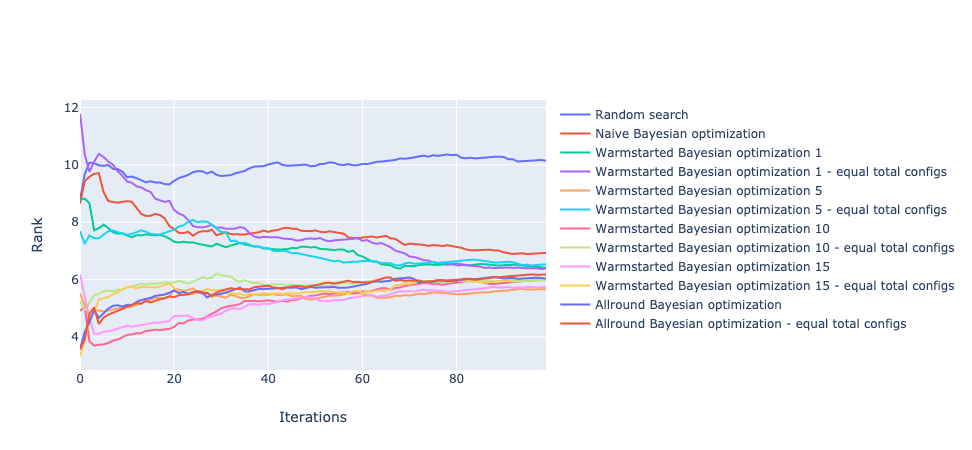

In [19]:
hopt_exp.visualize_avg_ranks()

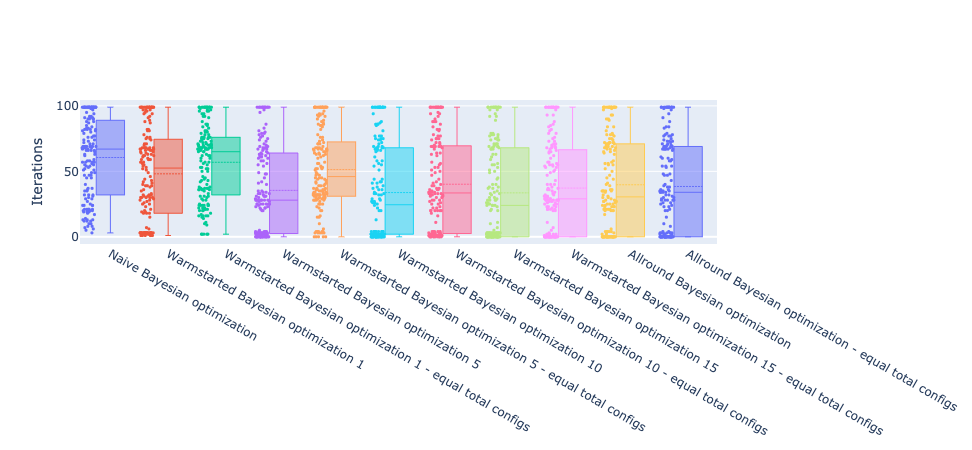

In [20]:
hopt_exp.visualize_walltime_comparison('Random search', 100)

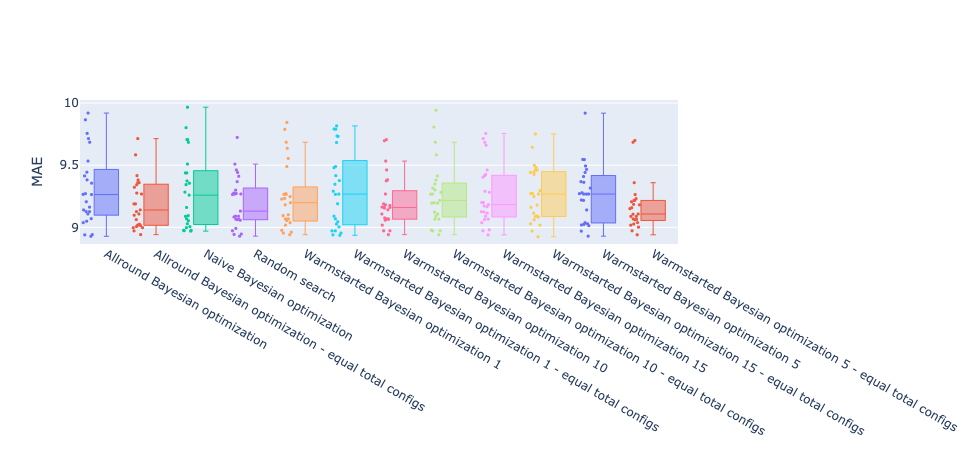

In [21]:
hopt_exp.visualize_perf_distribution('WEST_box_8760', range(5,10))

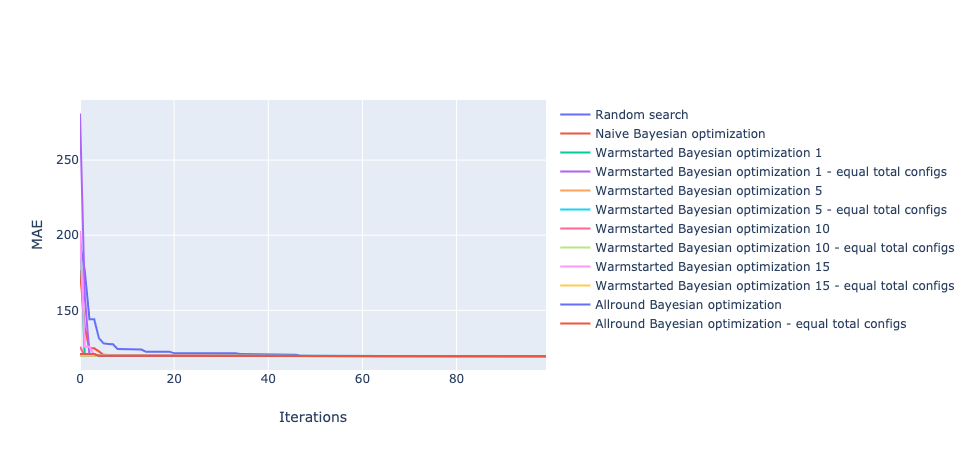

In [22]:
hopt_exp.visualize_avg_performance('COAST_diff_17520')